## Reinforcement Learning (RL)


Reinforcement Learning (Обучение с подкреплением) — это класс машинного обучения, в котором агент обучается принимать решения путем взаимодействия с окружающей средой. Агент принимает действия, получает обратную связь в виде вознаграждения или штрафа, и стремится максимизировать кумулятивное вознаграждение.

## Q-learning
[Q-learning](https://en.wikipedia.org/wiki/Q-learning) — это один из методов обучения с подкреплением, используемый для обучения агента принимать оптимальные действия в конкретной среде. Агент стремится выучить функцию Q, которая оценивает ожидаемую награду для каждой пары состояние-действие.

## Тестирование и Валидация

В контексте RL, тестирование и валидация играют важную роль. После обучения модели агента необходимо оценить ее производительность (тестирование) и убедиться в ее способности обобщения к различным ситуациям (валидация).

Тестирование в RL включает в себя запуск обученной модели в реальной среде и измерение ее производительности на основе определенных метрик. Валидация, с другой стороны, может включать в себя проверку способности модели адаптироваться к новым условиям или изменениям в среде.


### Установка зависимостей

На первом шаге мы начинаем с установки необходимых библиотек. Пакет [gymnasium](https://en.wikipedia.org/wiki/Q-learning#Deep_Q-learning) предоставляет различные среды для обучения с подкреплением, в то время как [stable-baselines3](https://en.wikipedia.org/wiki/Q-learning#Deep_Q-learning) предоставляет реализации различных алгоритмов обучения с подкреплением.


Эти пакеты будут использованы в дальнейшем коде для создания среды и реализации алгоритма обучения с подкреплением.

In [1]:
# Установка необходимых библиотек
!pip install gymnasium[all]
!pip install autorom[accept-rom-license]
!pip install stable-baselines3
!pip install PyVirtualDisplay
!sudo apt-get install xvfb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.8/211.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.3 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ER

После установки мы импортируем два основных модуля: gym и [DQN](https://en.wikipedia.org/wiki/Q-learning#Deep_Q-learning) из stable_baselines3. gym предоставляет инструменты для создания и использования различных сред для обучения агента, в то время как DQN (Deep Q-Network) представляет собой алгоритм Q-learning с использованием нейронных сетей для оценки функции Q.

In [2]:
# Импорт необходимых пакетов
import gymnasium as gym
from stable_baselines3 import DQN

### Выбор среды
Давайте определим задачу, которую мы будем решать, используя алгоритм Q-learning и библиотеки gym и stable-baselines3. В данной работе мы будем использовать среду [CartPole](https://www.gymlibrary.dev/environments/classic_control/cart_pole/), предоставляемую Gym. Эта задача заключается в управлении тележкой таким образом, чтобы удерживать шест в вертикальном положении.


#### Создание среды CartPole

Мы используем метод gym.make() для создания среды с именем 'CartPole-v1'. Эта среда предоставляет задачу с тележкой и шестом.

In [8]:
# Создание среды CartPole
env = gym.make('FrozenLake-v1',map_name="4x4", is_slippery=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Описание задачи
Мы сохраняем информацию о пространстве наблюдений (observation_space) и пространстве действий (action_space). observation_space представляет собой пространство всех возможных состояний в задаче, а action_space - пространство всех возможных действий, которые агент может предпринять.

In [9]:
# Описание задачи
observation_space = env.observation_space
action_space = env.action_space

Эти шаги предварительно готовят нас к использованию выбранной среды для обучения и тестирования агента с использованием алгоритма Q-learning.

### Решение задачи
На этом шаге мы используем алгоритм Q-learning, представленный в stable-baselines3, для решения задачи CartPole. Давайте разберем каждый этап.


#### Инициализация модели DQN
Мы создаем экземпляр модели Deep Q-Network (DQN) с использованием DQN("MlpPolicy", env, verbose=1). Здесь "MlpPolicy" означает полносвязную нейронную сеть в качестве политики. env - это среда CartPole, а verbose=1 добавляет вывод для отслеживания прогресса обучения.

In [10]:
# Инициализация модели DQN
model = DQN("MlpPolicy", env, verbose=1)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


#### Обучение модели
Мы вызываем метод learn() для обучения модели на 100 временных шагах (total_timesteps=100).

In [ ]:
# Обучение модели
timestamp=10000000
model.learn(total_timesteps=timestamp, log_interval=10000)
model.save("dqn_cartpole")

In [36]:
# actions=[]
# rewards=[]
# env = gym.make('FrozenLake-v1',map_name="4x4", is_slippery=False)
# obs = env.reset()

# for i in range(100):
#     action, _states = model.predict(obs)
#     obs, reward, terminated, truncated = env.step(int(action))
#     rewards.append(reward)
#     actions.append(action)
#     if terminated:
#       break

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [37]:
# actions, rewards

([array(2), array(2), array(1), array(1), array(1), array(2)],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0])

#### Тестирование модели
Мы тестируем обученную модель, используя цикл, в котором агент принимает решения в соответствии с обученной политикой на каждом временном шаге. Мы используем метод render(), чтобы визуализировать среду в реальном времени.

In [12]:
!sudo apt-get install xvfb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.5).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


[array(2), array(2), array(1), array(1), array(1), array(2), array(2), array(2), array(2), array(2), array(2), array(2), array(2), array(2), array(2), array(2), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(3), array(2), array(2), array(2), array(2), array(2), array(0), array(2), array(2), array(2), array(3), array(2), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(3), array(2), array(2), array(2), array(2), array(2), array(2), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1),

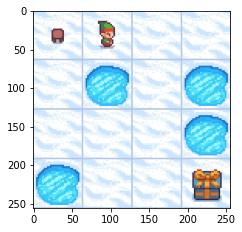

In [40]:
import gym
from IPython import display
from pyvirtualdisplay import Display
import matplotlib.pyplot as plt
from matplotlib import animation


d = Display()
d.start()

env = gym.make('FrozenLake-v1',map_name="4x4", is_slippery=False)

obs = env.reset()

img = []
for _ in range(100):
    action, _states = model.predict(obs)
    obs, reward, terminated, truncated = env.step(int(action))

    rewards.append(reward)
    actions.append(action)

    display.clear_output(wait=True)
    img.append(env.render('rgb_array'))

    if terminated:
        print(actions, rewards)
        env.reset()
        break

dpi = 72
interval = 75 # ms

plt.figure(figsize=(img[0].shape[1]/dpi,img[0].shape[0]/dpi),dpi=dpi)
patch = plt.imshow(img[0])
plt.axis=('off')
animate = lambda i: patch.set_data(img[i])
ani = animation.FuncAnimation(plt.gcf(),animate,frames=len(img),interval=interval)
display.display(display.HTML(ani.to_jshtml()))

#### Закрытие среды после тестирования
По завершении тестирования мы закрываем среду с помощью env.close().

In [ ]:
# Закрытие среды после тестирования
env.close()

В рамках самостоятельной работы попробуйте обучить и протестировать модель на другой среды доступной в gymnasium.